In [92]:
# packages for data processing
import pandas as pd
import re
import numpy as np

# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# read in yelp business data 
BUSINESS_DATA_PATH = '/Users/carolwang/Desktop/yelp_dataset/yelp_academic_dataset_business.json'

business_df = pd.read_json(BUSINESS_DATA_PATH, lines=True)
print(business_df.shape)
business_df.head()

(150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [94]:
# extract Cafes/Coffee/Tea/Bubble Tea shops in California or Nevada
desired_categories = ['cafes', 'cafe' 'coffee', 'tea', 'bubble tea']
pattern = r'\b(?:' + '|'.join(map(re.escape, desired_categories)) + r')\b'
cafe_df = business_df[((business_df['state'] == 'CA') | (business_df['state'] == 'NV')) & 
                      (business_df['categories'].str.contains(pattern, case=False, regex=True))]
print(cafe_df.shape)
cafe_df.head()

(590, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ..."
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,CA,93117,34.412934,-119.855531,3.0,184,1,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
691,-kY_HDP7IMvGl-kBIZVU4A,Dune Coffee Roasters - Anacapa,528 Anacapa St,Santa Barbara,CA,93101,34.418994,-119.695068,4.0,320,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Coffee & Tea, Coffee Roasteries, Food","{'Monday': '6:0-17:0', 'Tuesday': '6:0-17:0', ..."
766,3vTG6LQyr3obzfvrK1l1hA,7-Eleven,15 Eagle Canyon Dr,Sparks,NV,89441,39.638503,-119.712869,2.0,12,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Gas Stations, Service Stations, Convenie...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


/var/folders/sy/d_mpw2812q122t57j_kchk3r0000gn/T/ipykernel_5123/4163381645.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_attrs, y='attribute', x='count', palette='viridis')


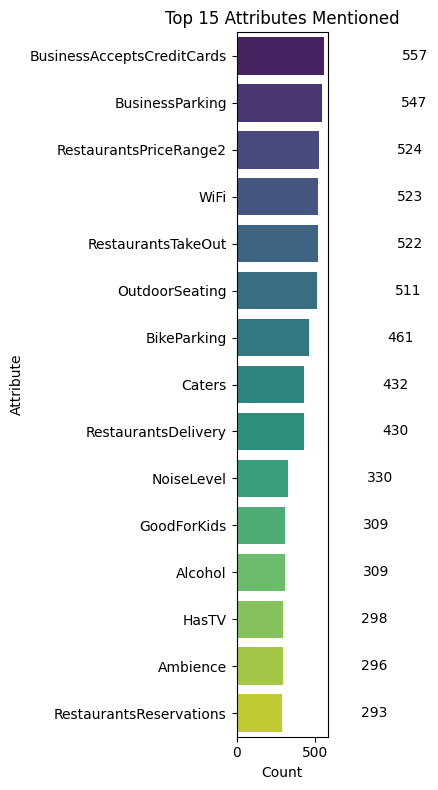

In [95]:
# exploratory data analysis to see how many times each attribute is mentioned in the attributes column

from collections import Counter

# drop rows with missing attributes
attributes_df = cafe_df['attributes'].dropna()

# count number of keys from attributes_df
keys = Counter()
for attr in attributes_df:
    keys.update(attr.keys())

# df of how many times each attribute occurs in the attributes column, sorted in desc order
attr_counts_df = pd.DataFrame.from_dict(keys, orient='index', columns=['count'])
attr_counts_df = attr_counts_df.sort_values(by='count', ascending=False)

top_n = 15
top_attrs = attr_counts_df.head(top_n).reset_index()
top_attrs.columns = ['attribute', 'count']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=top_attrs, y='attribute', x='count', palette='viridis')

for i, row in top_attrs.iterrows():
    ax.text(row['count'] + 500, i, str(row['count']), va='center')

plt.title(f'Top {top_n} Attributes Mentioned')
plt.xlabel('Count')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()


In [96]:
def calculate_weekly_hours(hours_dict):
    if not isinstance(hours_dict, dict):
        return 0
    
    total_hours = 0
    for day, time_range in hours_dict.items():
        if time_range == '0:0-0:0':  # closed this day
            continue
            
        try:
            open_time, close_time = time_range.split('-')
            
            # prase hours and mins
            open_hour, open_min = map(int, open_time.split(':'))
            close_hour, close_min = map(int, close_time.split(':'))
            
            # calculating duration in hours
            hours = close_hour - open_hour
            minutes = close_min - open_min
            
            # adjusting if closed after midnight
            if hours < 0:
                hours += 24
                
            # calculate total hours with minutes
            total_hours += hours + minutes/60
            
        except (ValueError, AttributeError):
            # skip if we can't parse the time format
            continue
    
    # open 24/7
    if total_hours == 0.0 and len(hours_dict) == 7:
        total_hours = 168
    
    return total_hours

In [97]:
final_df = pd.DataFrame({
    'business_id' : cafe_df['business_id'],
    'name': cafe_df['name'],
    'state' : cafe_df['state'],
    'city' : cafe_df['city'],
    'weekly_hours': cafe_df['hours'].apply(calculate_weekly_hours)
})

In [98]:
def get_attribute(row, attr_name, default_value=None):
    if row.get('attributes') is None:
        return default_value
    
    if isinstance(row['attributes'], dict) and attr_name in row['attributes']:
        return row['attributes'][attr_name]
    
    return default_value

# business attributes
final_df = pd.DataFrame({
    'business_id': cafe_df['business_id'],
    'name': cafe_df['name'],
    'state': cafe_df['state'],
    'city': cafe_df['city'],
    'stars': cafe_df['stars'],
    'review_count': cafe_df['review_count'],
    'weekly_hours': cafe_df['hours'].apply(calculate_weekly_hours)
})

# to add attributes as a column from the attributes column from the yelp data
attributes_to_add = {
    'BusinessAcceptsCreditCards': 'accepts_credit_cards',
    'BusinessParking': 'parking',
    'RestaurantsPriceRange2': 'price_range',
    'WiFi': 'wifi',
    'RestaurantsTakeOut': 'takeout',
    'OutdoorSeating': 'outdoor_seating',
    'BikeParking': 'bike_parking',
    'Caters': 'caters',
    'RestaurantsDelivery': 'delivery',
    'NoiseLevel': 'noise_level'
}

In [99]:
# extract each attribute and add to the final dataframe
for original_name, new_name in attributes_to_add.items():
    final_df[new_name] = cafe_df.apply(lambda row: get_attribute(row, original_name), axis=1)

# cleaning - convert string 'true' or 'false' to 0 or 1 values
boolean_columns = ['accepts_credit_cards', 'takeout', 'outdoor_seating', 
                  'bike_parking', 'caters', 'delivery']

for col in boolean_columns:
    final_df[col] = final_df[col].map({'True': 1, 'False': 0})
    final_df[col] = final_df[col].fillna(0)

# convert price range to numeric
final_df['price_range'] = pd.to_numeric(final_df['price_range'], errors='coerce')



In [100]:
# wifi separately
def convert_wifi(wifi_value):
    if pd.isna(wifi_value):
        return 0.0
    
    # wifi stored as: "u'free'" or "u'paid'" or "u'no'"
    wifi_value = str(wifi_value)
    if 'free' in wifi_value or 'paid' in wifi_value:
        return 1.0
    if 'no' in wifi_value:
        return 0.0
    
    return 0.0  # default

final_df['wifi'] = final_df['wifi'].apply(convert_wifi)

In [101]:
# convert noise level to numerical value and NA values with the average noise level of all cafes

def convert_noise_level(noise_value):
    if pd.isna(noise_value):
        return np.nan
    
    # convert to string
    noise_str = str(noise_value).lower()
    
    if 'quiet' in noise_str:
        return 0.0
    elif 'average' in noise_str:
        return 1.0
    elif 'loud' in noise_str and 'very' not in noise_str:
        return 2.0
    elif 'very_loud' in noise_str or 'very loud' in noise_str:
        return 3.0
    else:
        return np.nan
    
final_df['noise_level'] = final_df['noise_level'].apply(convert_noise_level)

mean_noise = final_df['noise_level'].dropna().mean()
final_df['noise_level'] = final_df['noise_level'].fillna(mean_noise)

In [102]:
# for BusinessParking, extract valet and other parking types separately
def parse_parking(parking_str):
    if not parking_str or pd.isna(parking_str):
        return 0.0, 0.0
    
    # try to evaluate if it's a dictionary-like string
    try:
        parking_dict = eval(parking_str.replace('u\'', '\'').replace('None', 'False'))
        
        # extract valet parking specifically
        has_valet = 1.0 if parking_dict.get('valet', False) else 0.0
        
        # check if any other parking type is available
        other_parking_types = ['garage', 'street', 'validated', 'lot']
        has_other_parking = 1.0 if any(parking_dict.get(type, False) for type in other_parking_types) else 0.0
        
        return has_valet, has_other_parking
    except:
        return 0.0, 0.0

# apply the function and create separate columns
parking_result = final_df['parking'].apply(parse_parking)
final_df['valet_parking'] = [result[0] for result in parking_result]
final_df['other_parking'] = [result[1] for result in parking_result]

# remove original parking column
final_df = final_df.drop('parking', axis=1)

In [103]:
final_df.head(n=10)

,business_id,name,state,city,stars,review_count,weekly_hours,accepts_credit_cards,price_range,wifi,takeout,outdoor_seating,bike_parking,caters,delivery,noise_level,valet_parking,other_parking
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,CA,Santa Barbara,4.0,389,36.00,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,1.0
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,CA,Goleta,4.0,189,75.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0,1.0
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,CA,Isla Vista,3.0,184,77.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.000000,0.0,1.0
691,-kY_HDP7IMvGl-kBIZVU4A,Dune Coffee Roasters - Anacapa,CA,Santa Barbara,4.0,320,76.00,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.0,1.0
766,3vTG6LQyr3obzfvrK1l1hA,7-Eleven,NV,Sparks,2.0,12,168.00,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.863636,0.0,1.0
1296,pxuMxh5oC7W-PDN9wwvozg,Starbucks,NV,Reno,3.0,44,96.50,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.863636,0.0,1.0
1320,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,CA,Santa Barbara,4.5,116,54.25,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0
1364,jlkDIOPoRP9SJXTkRVpkMQ,BFF Cafe,NV,Reno,4.0,92,74.00,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0,1.0
1526,w8C_pRQvdIXQ5VRWlW2M3w,The Human Bean,NV,Reno,4.5,37,80.00,1.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.863636,0.0,1.0
2265,F3dxQiOwN55rSLw-BNSq6A,Sweet Alley,CA,Goleta,4.0,51,77.00,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.863636,0.0,1.0


In [104]:
# final_df.to_csv('cafe_data.csv', index=False)

In [116]:
df = pd.read_csv('cafe_data.csv')
df.head()

,business_id,name,state,city,stars,review_count,weekly_hours,accepts_credit_cards,price_range,wifi,takeout,outdoor_seating,bike_parking,caters,delivery,noise_level,valet_parking,other_parking
0,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,CA,Santa Barbara,4.0,389,36.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,1.0
1,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,CA,Goleta,4.0,189,75.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0,1.0
2,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,CA,Isla Vista,3.0,184,77.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.000000,0.0,1.0
3,-kY_HDP7IMvGl-kBIZVU4A,Dune Coffee Roasters - Anacapa,CA,Santa Barbara,4.0,320,76.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.0,1.0
4,3vTG6LQyr3obzfvrK1l1hA,7-Eleven,NV,Sparks,2.0,12,168.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.863636,0.0,1.0


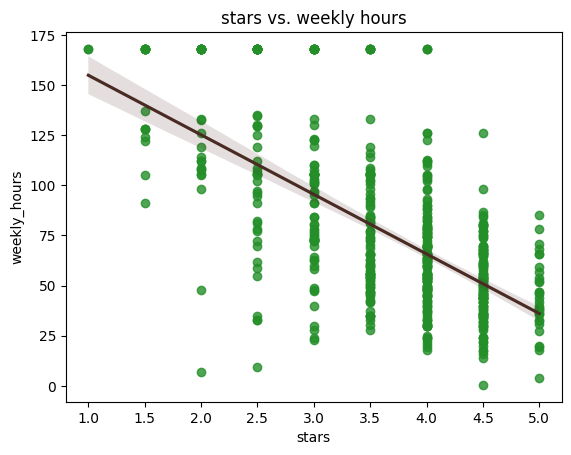

/var/folders/sy/d_mpw2812q122t57j_kchk3r0000gn/T/ipykernel_5123/778967117.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='noise_level', y='stars', palette='viridis')


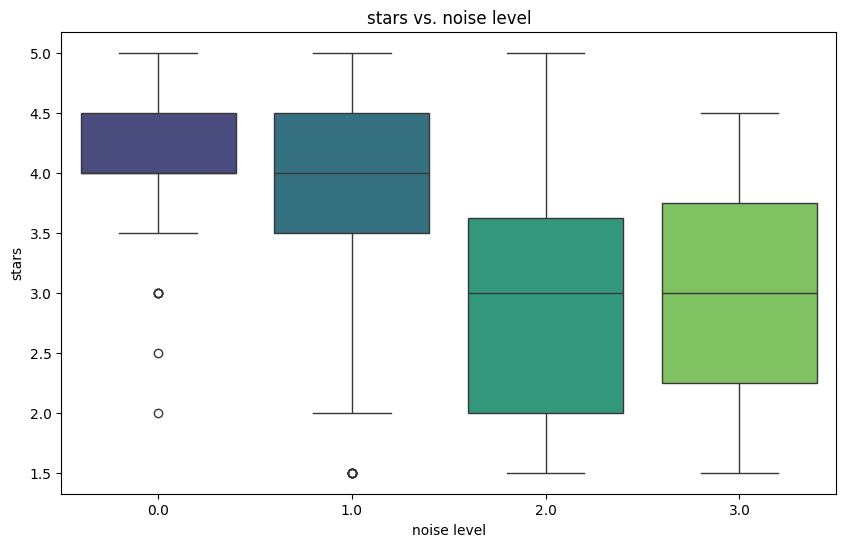

In [141]:
# plots for attributes with signig code 0 (***), which are the attributes that have the greatest impact on the star rating.
# although takeout and delivery are also highly significant attributes, we omit those plots since those are binary values.

# stars vs. weekly hours
sns.regplot(data=df, x='stars', y='weekly_hours', color='#248f29', line_kws={'color': '#4a2b24'})  
plt.title('stars vs. weekly hours')
plt.show()

# stars. vs. noise_level
# omit cafes where noise_level was missing
clean_df = df[df['noise_level'].round(2) != 0.86]
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='noise_level', y='stars', palette='viridis')
plt.title('stars vs. noise level')
plt.xlabel('noise level')
plt.ylabel('stars')
plt.show()
